Elaborado por Alberto Armando Huerta Ornelas

**Ejercicio 1. (50 puntos)**
Cargue los datos de incidentes viales reportados por C5 (Viales_2022_2024.csv en Github) y realice lo siguiente:

a) Obtenga un Dataframe con los tipos de incidentes y su frecuencia. Obtenga un gráfico que ilustre esto.

b) Obtenga un Dataframe con los incidentes y su frecuencia. Obtenga un gráfico que ilustre esto.

c) Obtenga un gráfico de barras que iluste el número de incidentes por alcaldía (columna 'alcaldia_inicio').

d) Obtenga una serie temporal con el número de atropellados por semana y grafique la serie.

e) Obtenga un mapa de calor (HeatMap) que muestre la ubicación geográfica de los reportes de personas atropelladas, utilizando las coordenadas de latitud y longitud asociadas a cada incidente.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Viales_2022_2024.csv'
df=pd.read_csv(ruta, chunksize=10_000)
df=pd.concat(df, ignore_index=True)
df.head()

,fecha_creacion,hora_creacion,tipo_incidente_c4,incidente_c4,alcaldia_inicio,clas_con_f_alarma,tipo_entrada,alcaldia_catalogo,colonia_catalogo,longitud,latitud
0,2021-12-29,23:21:20,Lesionado,Atropellado,NaN,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,Cuauhtémoc,Roma Norte,-99.163670,19.421610
1,2022-01-01,09:51:53,Accidente,Motociclista,CUAUHTEMOC,URGENCIAS MEDICAS,RADIO,Miguel Hidalgo,Tlaxpana,-99.165781,19.443649
2,2022-01-01,09:56:54,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,EMERGENCIA,BOTÓN DE AUXILIO,Gustavo A. Madero,C T M Aragon,-99.054690,19.451630
3,2021-12-31,21:47:36,Accidente,Motociclista,XOCHIMILCO,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,Xochimilco,Cerrillos Primera Seccion,-99.020370,19.245690
4,2022-01-01,03:43:56,Accidente,Motociclista,IZTAPALAPA,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,Iztapalapa,Celoalliotli,-99.071140,19.291070


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168087 entries, 0 to 168086
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fecha_creacion     168087 non-null  object 
 1   hora_creacion      168087 non-null  object 
 2   tipo_incidente_c4  168087 non-null  object 
 3   incidente_c4       168087 non-null  object 
 4   alcaldia_inicio    168075 non-null  object 
 5   clas_con_f_alarma  168087 non-null  object 
 6   tipo_entrada       168085 non-null  object 
 7   alcaldia_catalogo  167878 non-null  object 
 8   colonia_catalogo   164415 non-null  object 
 9   longitud           168087 non-null  float64
 10  latitud            168087 non-null  float64
dtypes: float64(2), object(9)
memory usage: 14.1+ MB


a) Obtenga un Dataframe con los tipos de incidentes y su frecuencia. Obtenga un gráfico que ilustre esto.

In [29]:
# DataFrame con los tipos de accidente y su frecuencia

df_tipo_incidente_c4 = df.groupby('tipo_incidente_c4').size().reset_index(name='Frecuencia')
df_tipo_incidente_c4.sort_values(by='Frecuencia', ascending=False, inplace=True)
df_tipo_incidente_c4.head(7)

,tipo_incidente_c4,Frecuencia
0,Accidente,150097
3,Lesionado,17356
1,Cadáver,353
2,Detención ciudadana,120
4,Mi Calle,105
6,Sismo,36
5,Mi Taxi,20


In [27]:
len(df_tipo_incidente_c4)

7

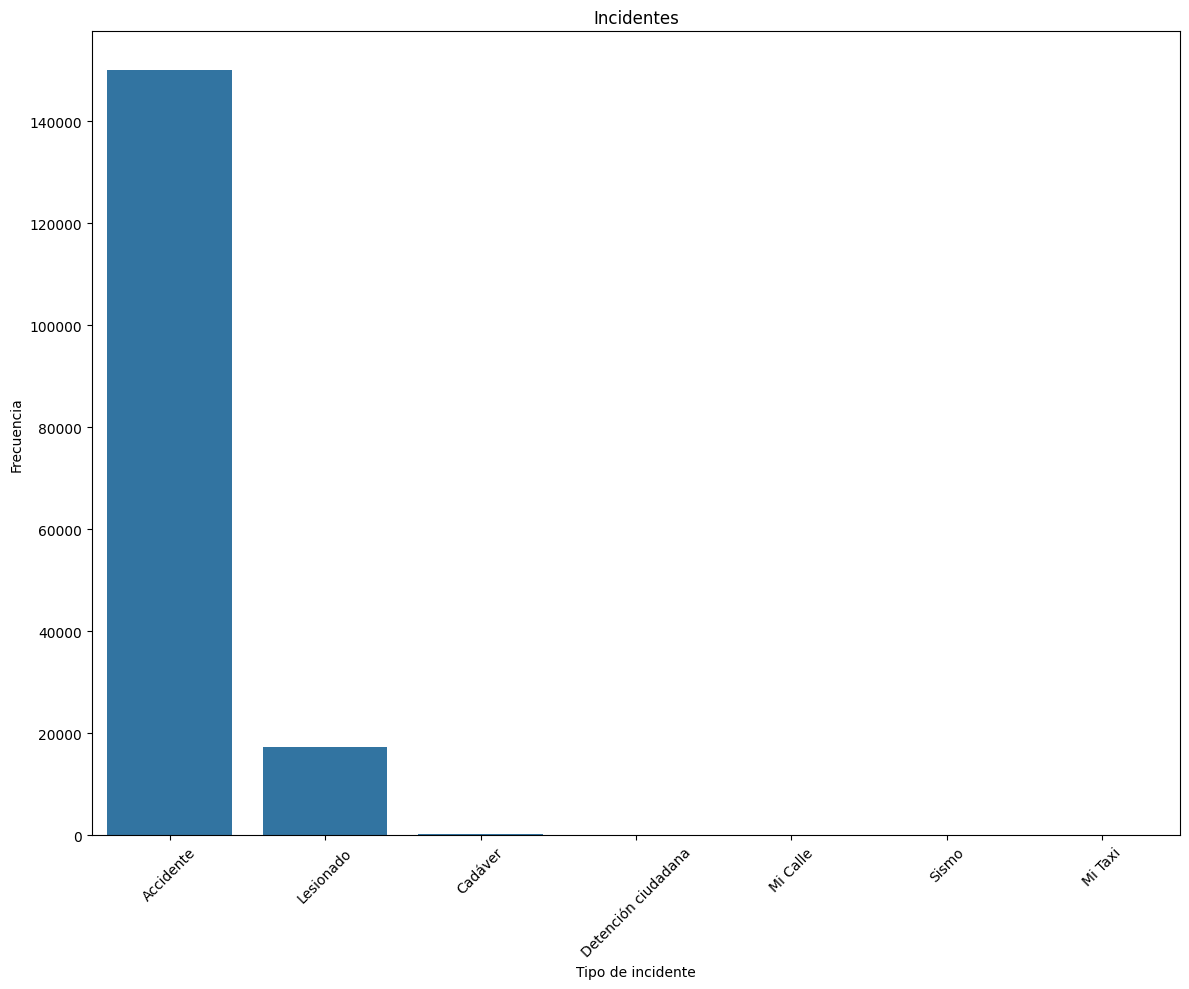

In [28]:
# Grafico de incidentes

plt.figure(figsize=(12, 10))
sns.barplot(x='tipo_incidente_c4', y='Frecuencia', data=df_tipo_incidente_c4.head(7))
plt.title('Incidentes')
plt.xlabel('Tipo de incidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

b) Obtenga un Dataframe con los incidentes y su frecuencia. Obtenga un gráfico que ilustre esto.

In [31]:
# DatFrame con los accidentes y su frecuencia

df_incidente = df.groupby('incidente_c4').size().reset_index(name='Frecuencia')
df_incidente.sort_values(by='Frecuencia', ascending=False, inplace=True)
df_incidente.head(16)

,incidente_c4,Frecuencia
4,Choque sin lesionados,77067
2,Choque con lesionados,48834
1,Atropellado,17559
9,Motociclista,16753
15,Volcadura,3010
5,Ciclista,2241
11,Persona atrapada / desbarrancada,914
14,Vehículo atrapadovarado,700
3,Choque con prensados,334
0,Accidente automovilístico,270


In [30]:
len(df_incidente)

16

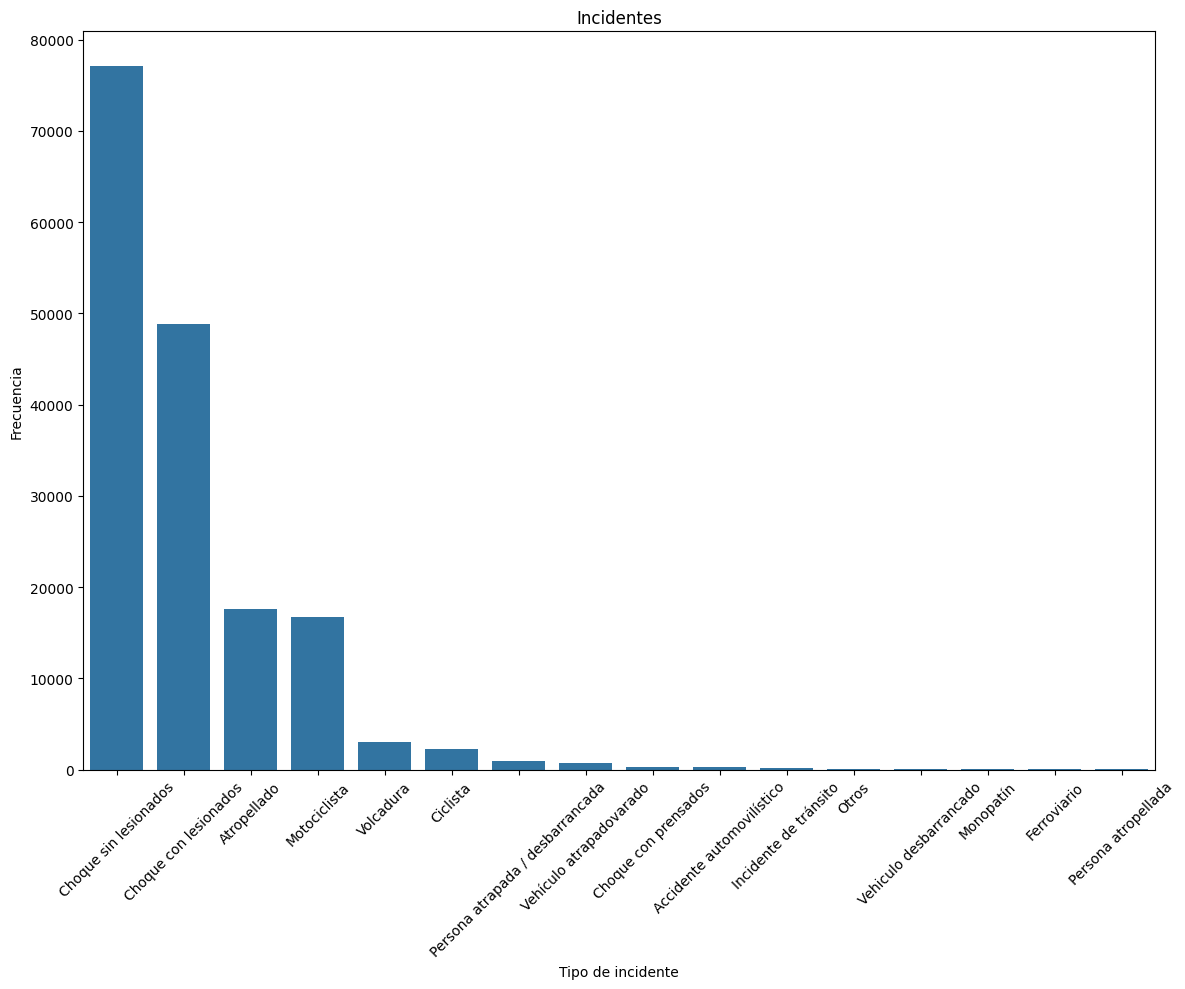

In [32]:
# Grafico con los incidentes y su frecuencia

plt.figure(figsize=(12, 10))
sns.barplot(x='incidente_c4', y='Frecuencia', data=df_incidente.head(16))
plt.title('Incidentes')
plt.xlabel('Tipo de incidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c) Obtenga un gráfico de barras que iluste el número de incidentes por alcaldía (columna 'alcaldia_inicio').

In [12]:
len(df_incidente_alcaldia)

16

In [13]:
# DataFrame de numero de incidentes por alcaldia

df_incidente_alcaldia = df.groupby('alcaldia_inicio').size().reset_index(name='Frecuencia')
df_incidente_alcaldia.sort_values(by='Frecuencia', ascending=False, inplace=True)
df_incidente_alcaldia.head(16)

,alcaldia_inicio,Frecuencia
8,IZTAPALAPA,27437
6,GUSTAVO A. MADERO,18846
5,CUAUHTEMOC,17461
3,COYOACAN,12363
14,VENUSTIANO CARRANZA,12217
2,BENITO JUAREZ,12147
13,TLALPAN,12092
0,ALVARO OBREGON,11368
10,MIGUEL HIDALGO,10309
7,IZTACALCO,8206


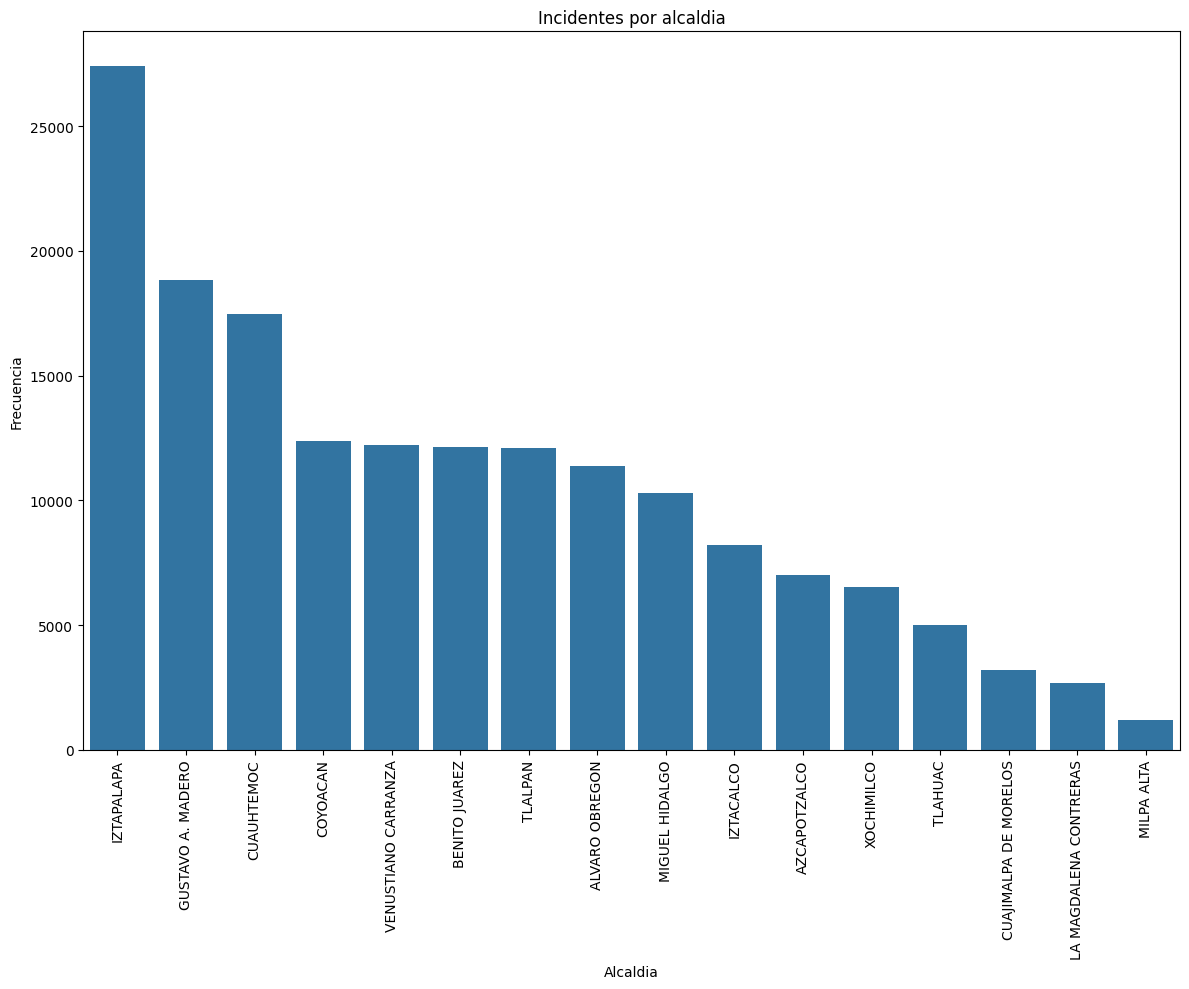

In [15]:
# Grafico de barras del numero de incidentes por alcaldia

plt.figure(figsize=(12, 10))
sns.barplot(x='alcaldia_inicio', y='Frecuencia', data=df_incidente_alcaldia.head(16))
plt.title('Incidentes por alcaldia')
plt.xlabel('Alcaldia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

d) Obtenga una serie temporal con el número de atropellados por semana y grafique la serie.

In [51]:
# DataFrame del numero de atropellados por semana

df_atropellados = df[df['incidente_c4'] == 'Atropellado'].copy()
df_atropellados['fecha_creacion'] = pd.to_datetime(df_atropellados['fecha_creacion'])
df_atropellados.set_index('fecha_creacion', inplace=True)
serie_atropellados = df_atropellados.resample('W').size()
serie_atropellados.head(114)

,0
fecha_creacion,
2022-01-02,29
2022-01-09,134
2022-01-16,99
2022-01-23,115
2022-01-30,114
...,...
2024-02-04,169
2024-02-11,140
2024-02-18,168


In [52]:
# Poner nombre 'atropellados a la segunda columna

serie_atropellados.name = 'atropellados'
serie_atropellados.head(114)

,atropellados
fecha_creacion,
2022-01-02,29
2022-01-09,134
2022-01-16,99
2022-01-23,115
2022-01-30,114
...,...
2024-02-04,169
2024-02-11,140
2024-02-18,168


In [53]:
len(serie_atropellados)

114

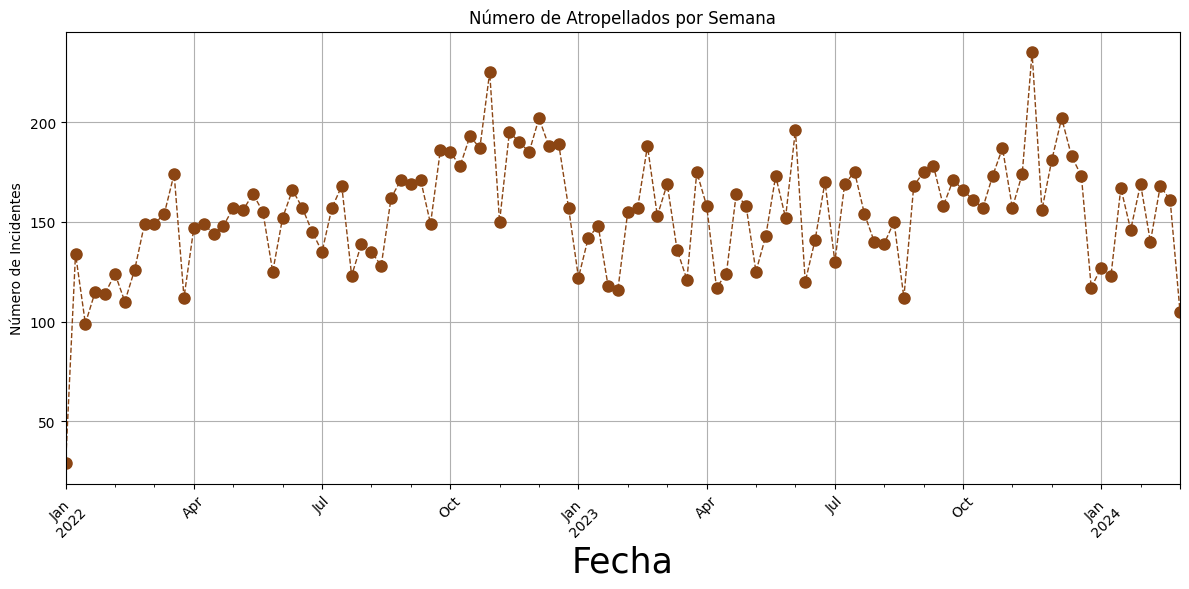

In [58]:
# Grafico de la serie temporal del numero de atropellados por semana

plt.figure(figsize=(12, 6))
serie_atropellados.plot(lw=1, color='saddlebrown', linestyle='dashed', marker='o', markersize=8)
plt.title('Número de Atropellados por Semana')
plt.xlabel('Fecha', fontdict={'fontsize':25})
plt.ylabel('Número de Incidentes')
plt.grid(True)
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

e) Obtenga un mapa de calor (HeatMap) que muestre la ubicación geográfica de los reportes de personas atropelladas, utilizando las coordenadas de latitud y longitud asociadas a cada incidente.

In [69]:
# Mapa de calor

from folium.plugins import HeatMap
import folium

mapa = folium.Map(location=[19.4326, -99.1332], zoom_start=11)  # Centro en CDMX
heat_data = [[row['latitud'], row['longitud']] for index, row in atropellados.iterrows()
             if pd.notnull(row['latitud']) and pd.notnull(row['longitud'])]
HeatMap(heat_data).add_to(mapa)
mapa.save('heatmap_atropellados.html')

mapa


Ejercicio 2. (50 puntos)
Extraiga las tabla de "Terremotos de mayor magnitud" del siguiente enlace:

https://es.wikipedia.org/wiki/Anexo:Terremotos_de_mayor_magnitud

y realice lo siguiente:

a) Obtenga el siguiente Dataframe.
Nota. Si alguna fila no contiene la hora, coloquela como 00:00.

b) Obtenga un gráfico de barras que ilustre el año del terremoto y su magnitud.

c) ¿Cuándo y dónde ocurrió el terremoto de mayor magnitud en la historia?

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lxml
import requests
from bs4 import BeautifulSoup

In [92]:
# URL de la página de Wikipedia
url = "https://es.wikipedia.org/wiki/Anexo:Terremotos_de_mayor_magnitud"

In [93]:
# Obtener el contenido HTML de la página
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [94]:
# Encontrar la tabla de "Terremotos de mayor magnitud"
table = soup.find('table', {'class': 'wikitable'})

In [96]:
# Leer la tabla en un DataFrame de pandas
df = pd.read_html(str(table))[0]
df

/tmp/ipython-input-96-4073731842.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500


In [98]:
# Renombrar columnas según la estructura de la tabla actual
df.columns = ['N.º', 'Fecha y hora UTC', 'Magnitud', 'Nombre', 'País', 'Lugar y coordenadas', 'Muertes']
df

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500


In [99]:
# Función para extraer año, mes y día usando splits (asumiendo que 'Fecha y hora UTC' es la columna relevante)
def extraer_fecha(fecha_str):

    if pd.isna(fecha_str):
        return None, None, None

    partes = str(fecha_str).split()
    try:
        if 'de' in partes:
            de_indices = [i for i, part in enumerate(partes) if part == 'de']
            if len(de_indices) >= 2:
                día = int(partes[de_indices[0] - 1])
                mes_str = partes[de_indices[0] + 1]
                año = int(partes[de_indices[1] + 1].replace(',', ''))
            else:
                 día = int(partes[0])
                 mes_str = partes[2]
                 año = int(partes[4].replace(',', ''))
        else:
            día = int(partes[0])
            mes_str = partes[2]
            año = int(partes[4].replace(',', ''))


        # Diccionario para convertir mes de texto a número
        meses = {
            'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
            'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
        }
        mes = meses.get(mes_str.lower(), None)
        return año, mes, día
    except (ValueError, IndexError) as e:
        print(f"Could not parse date string: {fecha_str} - Error: {e}")
        return None, None, None

In [102]:
# Aplicar la función para crear columnas 'Año', 'Mes' y 'Día' de 'Fecha y hora UTC'
df[['Año', 'Mes', 'Día']] = df['Fecha y hora UTC'].apply(lambda x: pd.Series(extraer_fecha(x)))

In [103]:
# Convertit 'Año', 'Mes' y 'Día' a numéricos, obligando a los errores a NaN
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')
df['Mes'] = pd.to_numeric(df['Mes'], errors='coerce')
df['Día'] = pd.to_numeric(df['Día'], errors='coerce')

In [104]:
# Extraer Hora de 'Fecha y hora UTC'
df['Hora'] = df['Fecha y hora UTC'].str.extract(r'(\d{2}:\d{2})')
# Manejar la columna 'Hora', estableciendo "00:00" si no está presente o se extrae
df['Hora'].fillna("00:00", inplace=True)


/tmp/ipython-input-104-179338232.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hora'].fillna("00:00", inplace=True)


In [105]:
# Convertir Magnitud a float (reemplazar coma por punto), corrigiendo errores a NaN
df['Magnitud'] = df['Magnitud'].astype(str).str.replace(',', '.', regex=False).str.extract(r'(\d+\.\d+)').astype(float)

In [106]:
# Seleccione las columnas relevantes, incluida 'Muertes', y mantenga 'País'
df = df[['Año', 'Mes', 'Día', 'Hora', 'Magnitud', 'Muertes', 'País']]

In [107]:
# a) Mostrar el DataFrame
print("DataFrame de Terremotos de Mayor Magnitud:")
print(df)

DataFrame de Terremotos de Mayor Magnitud:
       Año   Mes   Día   Hora  Magnitud           Muertes  \
0   1960.0   5.0  22.0  15:11       9.5       1655 a 2000   
1   2004.0  12.0  26.0  00:58       9.3           230 270   
2   1964.0   3.0  28.0  03:36       9.2               128   
3   2011.0   3.0  11.0  05:46       9.1            15 897   
4   1952.0  11.0   4.0  16:58       9.0              2366   
5   1868.0   8.0  13.0  21:30       9.0               693   
6   1746.0  10.0  28.0  22:30       9.0   15 000 a 20 000   
7   1700.0   1.0  26.0  21:30       9.0         Sin datos   
8   2010.0   2.0  27.0  03:34       8.8               525   
9   1906.0   1.0  31.0  15:36       8.8              1500   
10  1833.0  11.0  25.0  20:00       8.8         Sin datos   
11  1755.0  11.0   1.0  10:16       8.7  60 000 a 100 000   
12  1730.0   7.0   8.0  04:45       8.7               300   
13  1619.0   2.0  14.0  11:30       8.7               550   
14  2012.0   4.0  11.0  15:38       8.6   

<Figure size 1200x600 with 0 Axes>

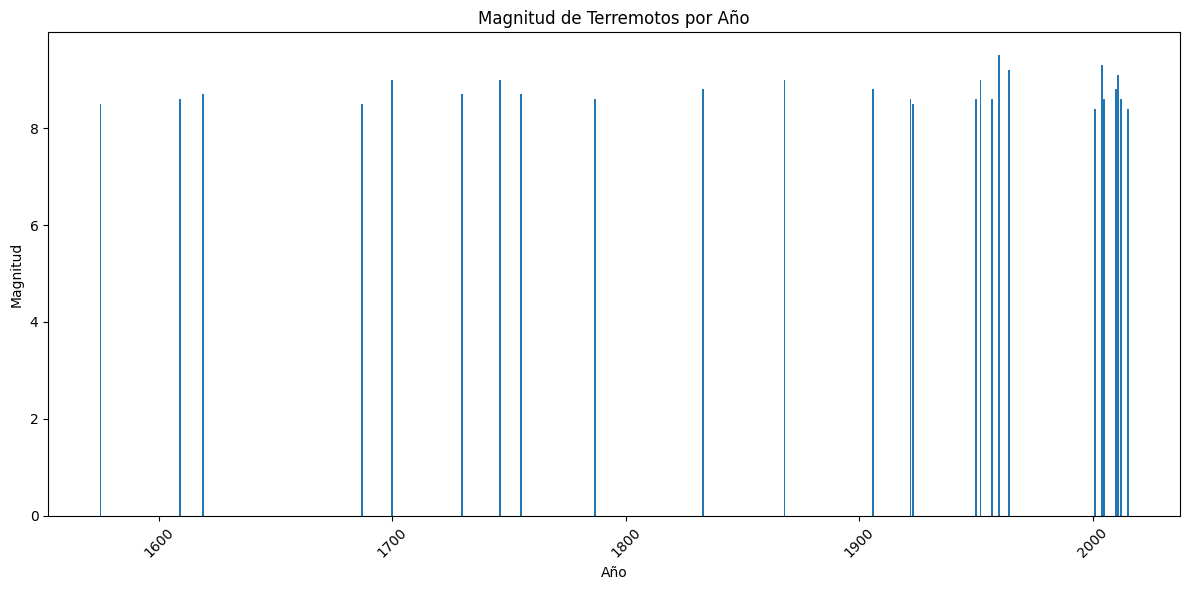

In [110]:
# b) Crear gráfico de barras
plt.figure(figsize=(12, 6))
df_plot = df.dropna(subset=['Año', 'Magnitud'])
plt.figure(figsize=(12, 6))
plt.bar(df_plot['Año'], df_plot['Magnitud'])
plt.xlabel('Año')
plt.ylabel('Magnitud')
plt.title('Magnitud de Terremotos por Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
# c) Identificar el terremoto de mayor magnitud
df['Magnitud'] = pd.to_numeric(df['Magnitud'], errors='coerce')
max_magnitud = df['Magnitud'].max()
terremoto_max = df[df['Magnitud'] == max_magnitud].iloc[0]

print("\nTerremoto de mayor magnitud en la historia:")

año = int(terremoto_max['Año']) if pd.notnull(terremoto_max['Año']) else 'N/A'
mes = int(terremoto_max['Mes']) if pd.notnull(terremoto_max['Mes']) else 'N/A'
día = int(terremoto_max['Día']) if pd.notnull(terremoto_max['Día']) else 'N/A'


formatted_mes = f"{mes:02d}" if isinstance(mes, int) else mes
formatted_día = f"{día:02d}" if isinstance(día, int) else día


date_str = f"{año}-"
date_str += f"{formatted_mes}-" if formatted_mes != 'N/A' else f"{formatted_mes}-"
date_str += f"{formatted_día}" if formatted_día != 'N/A' else f"{formatted_día}"


print(f"Cuándo: {date_str} {terremoto_max.get('Hora', 'N/A')}")
print(f"Dónde: {terremoto_max.get('País', 'N/A')}")
print(f"Magnitud: {terremoto_max.get('Magnitud', 'N/A')}")


Terremoto de mayor magnitud en la historia:
Cuándo: 1960-05-22 15:11
Dónde: Chile
Magnitud: 9.5


/tmp/ipython-input-109-2486943776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Magnitud'] = pd.to_numeric(df['Magnitud'], errors='coerce')
